# Xintong Wu (xw225) STATS 202 HW4

### About more discussion please refer to the open GitHub page: https://github.com/Xintong1122/STATS202HW4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

### 1. Data Loading and Visualization

In [2]:
# Load the data from GitHub
url = "https://raw.githubusercontent.com/Xintong1122/STATS202HW4/main/Data/bank-transactions.csv"
df = pd.read_csv(url)

# Display basic information
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData information:")
df.info()

print("\nDescriptive statistics:")
display(df.describe(include='all'))

# Set up the visualization style
sns.set(style="whitegrid")

Data shape: (2512, 16)

First 5 rows:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Fraud
0,T9431829,A6351588,70.3,2024/1/2 16:00,Debit,Kunming,D5099697,94.227.164.192,M7087554,ATM,21,Student,43,1,1354.3,False
1,T7408701,A2801961,493.6,2024/1/2 16:01,Credit,Beijing,D8275968,156.96.135.18,M9748413,Branch,27,Student,82,1,332.4,False
2,T7700364,A9407484,158.4,2024/1/2 16:01,Debit,Kunshan,D8291484,190.251.45.32,M9595278,Online,46,Engineer,71,1,8005.4,False
3,T6020910,A6076233,457.2,2024/1/2 16:06,Debit,Shanghai,D8435367,40.226.196.34,M4235301,Branch,65,Doctor,145,1,6365.9,False
4,T2907513,A5092857,210.6,2024/1/2 16:07,Debit,Suzhou,D9193536,150.231.20.169,M9986742,Online,77,Retired,163,1,4358.5,False



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        2512 non-null   object 
 1   AccountID            2512 non-null   object 
 2   TransactionAmount    2512 non-null   float64
 3   TransactionDate      2512 non-null   object 
 4   TransactionType      2512 non-null   object 
 5   Location             2512 non-null   object 
 6   DeviceID             2512 non-null   object 
 7   IP Address           2512 non-null   object 
 8   MerchantID           2512 non-null   object 
 9   Channel              2512 non-null   object 
 10  CustomerAge          2512 non-null   int64  
 11  CustomerOccupation   2512 non-null   object 
 12  TransactionDuration  2512 non-null   int64  
 13  LoginAttempts        2512 non-null   int64  
 14  AccountBalance       2512 non-null   float64
 15  Fraud              

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Fraud
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2405,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,2
top,T5321655,A2655522,NaN,2024/2/13 16:53,Debit,Chaozhou,D7396452,200.136.146.93,M9947061,Branch,NaN,Student,NaN,NaN,NaN,False
freq,1,12,NaN,3,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,2280
mean,NaN,NaN,302.503702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.174363,NaN,118.504777,1.124602,5114.288814,NaN
std,NaN,NaN,291.936260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.839986,NaN,69.919342,0.602662,3901.200646,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,5.000000,1.000000,52.400000,NaN
25%,NaN,NaN,86.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,61.000000,1.000000,1514.350000,NaN
50%,NaN,NaN,215.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,111.000000,1.000000,4752.200000,NaN
75%,NaN,NaN,418.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.250000,NaN,160.000000,1.000000,7686.950000,NaN


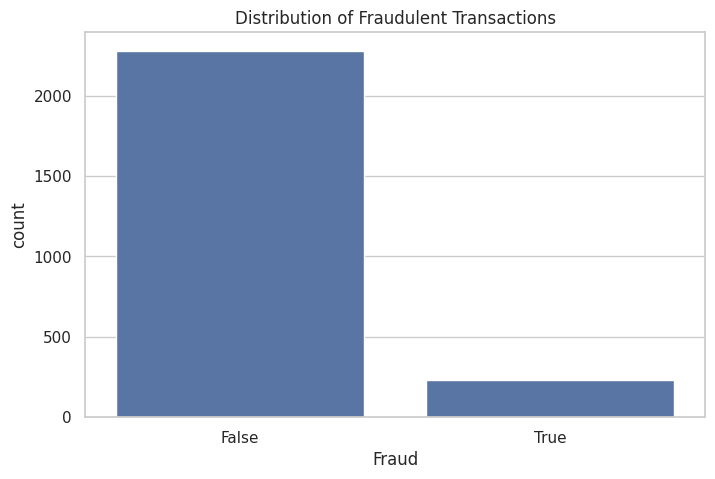

In [3]:
# Fraud distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

The dataset is highly imbalanced, with "False" (non-fraud) transactions vastly outnumbering "True" (fraud) cases

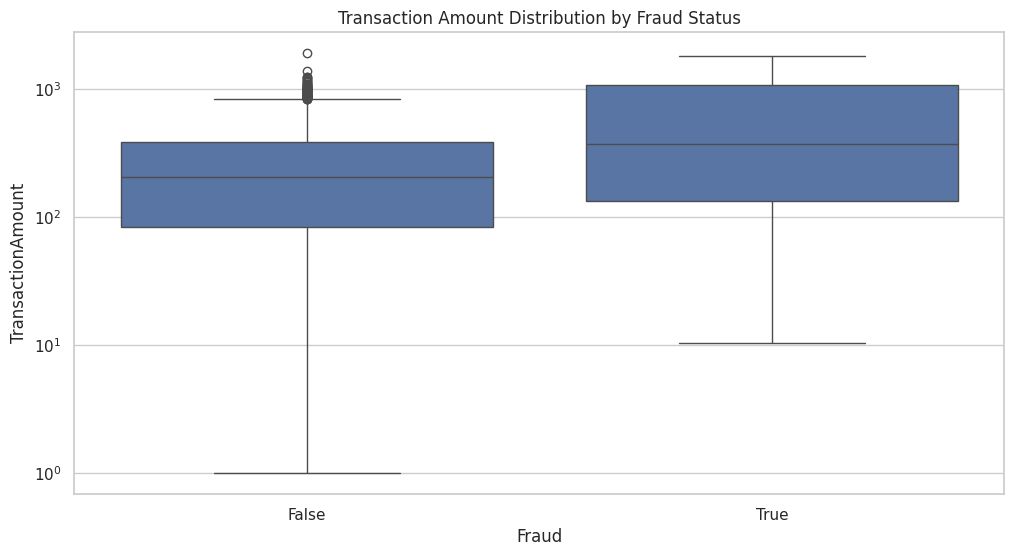

In [4]:
# Transaction amount distribution by fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud', y='TransactionAmount', data=df)
plt.yscale('log')  # Using log scale for better visualization
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

Fraudulent transactions ("True") show a wider spread and higher median amount (log-scale y-axis) compared to non-fraudulent ones.

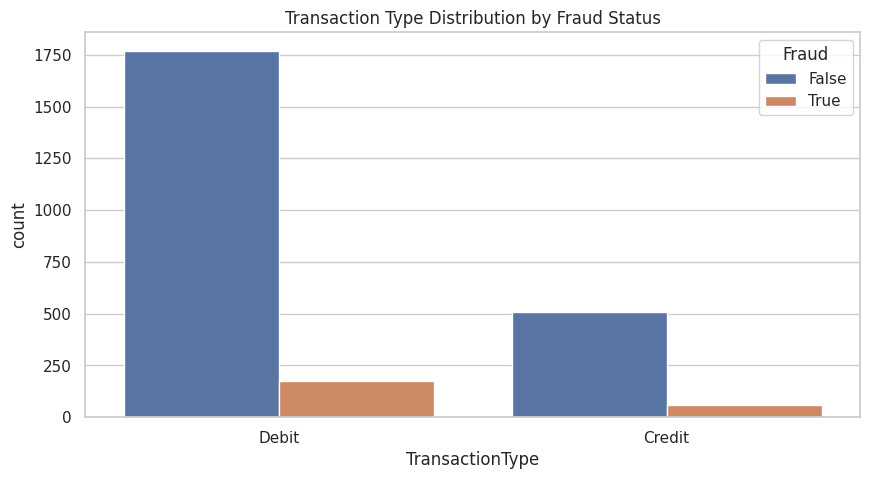

In [5]:
# Transaction type vs fraud
plt.figure(figsize=(10, 5))
sns.countplot(x='TransactionType', hue='Fraud', data=df)
plt.title('Transaction Type Distribution by Fraud Status')
plt.show()

Both Debit and Credit transactions include fraud cases, but fraud is relatively more frequent in Debit transactions (e.g., ~150 vs. ~50 for "True").

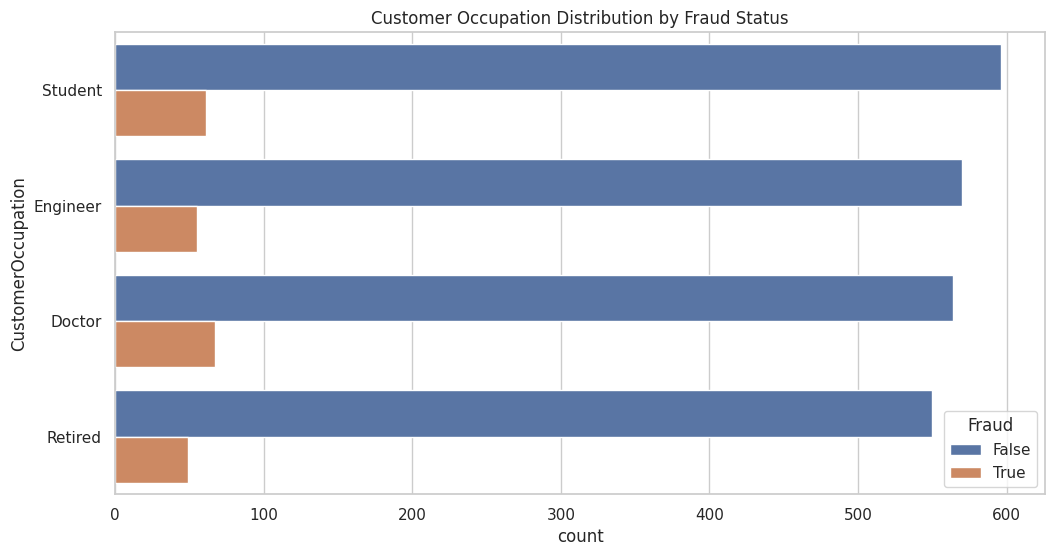

In [6]:
# Customer occupation vs fraud
plt.figure(figsize=(12, 6))
sns.countplot(y='CustomerOccupation', hue='Fraud', data=df)
plt.title('Customer Occupation Distribution by Fraud Status')
plt.show()

Fraud is unevenly distributed across occupations:

Students and Engineers show higher fraud counts (e.g., ~500 and ~300 for "False", but ~50 and ~30 for "True").

Doctors and Retired individuals have fewer fraud cases.

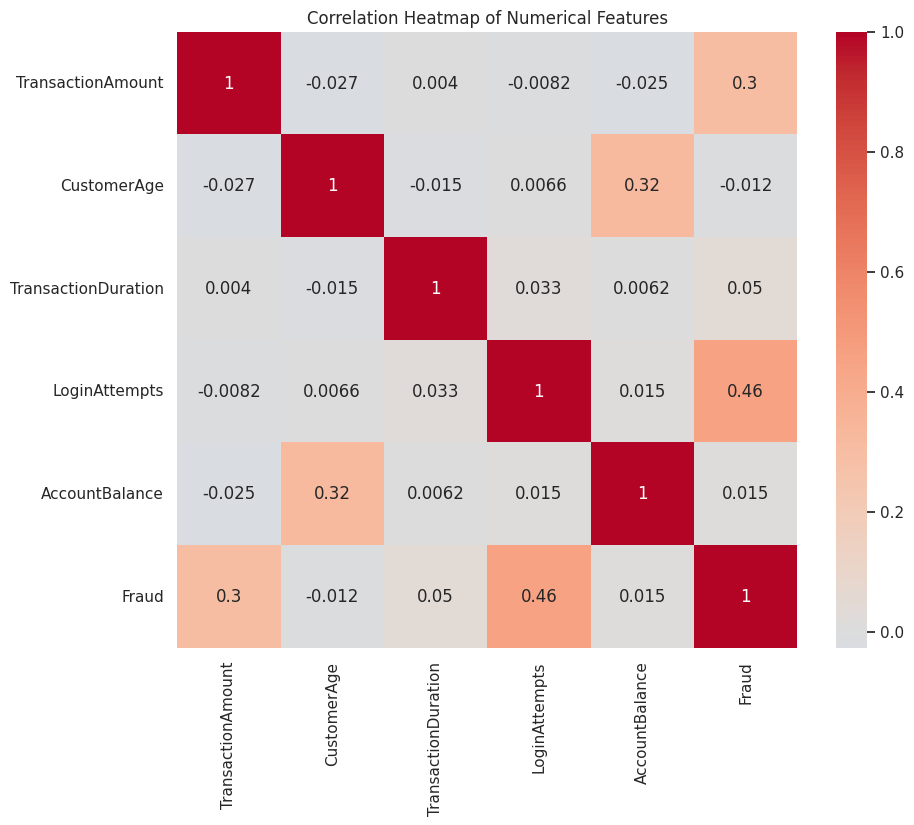

In [7]:
# Correlation heatmap for numerical features
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Fraud']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Strongest Positive Correlation: LoginAttempts (+0.46) → More login attempts are highly associated with fraud.

Strongest Negative Correlation: AccountBalance (-0.32) → Fraud is less likely with higher account balances.

### 2. Preprocessing

In [8]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values (if any)
# For this dataset, we'll assume there are no missing values based on the info() output
# But in a real scenario, we would handle them appropriately

# Convert Fraud to binary (0/1)
df['Fraud'] = df['Fraud'].astype(int)

# Convert TransactionDate to datetime and extract useful features
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionMonth'] = df['TransactionDate'].dt.month

# Drop columns that won't be useful for modeling
df = df.drop(['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID'], axis=1)

Missing values per column:
TransactionID          0
AccountID              0
TransactionAmount      0
TransactionDate        0
TransactionType        0
Location               0
DeviceID               0
IP Address             0
MerchantID             0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
Fraud                  0
dtype: int64


### 3. Feature Engineering

This step performs feature engineering to create new predictive features for fraud detection:

AmountToBalanceRatio: Transaction amount divided by account balance (+1 to avoid division by zero). Highlights high-risk transactions relative to available funds.

UnusualLoginAttempts: Binary flag (1 if login attempts > 3). Captures suspicious access patterns (aligned with the strong +0.46 fraud correlation).

IsNightTime: Binary flag for transactions between 8 PM–6 AM. Targets atypical hours often linked to fraud.

Purpose: Enhance model performance by transforming raw data into meaningful fraud signals based on domain knowledge and correlation insights.

In [14]:
# Create new features that might be useful for fraud detection

# Transaction amount relative to account balance
df['AmountToBalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)  # +1 to avoid division by zero

# Flag for unusual login attempts
df['UnusualLoginAttempts'] = (df['LoginAttempts'] > 3).astype(int)

# Time-based features
df['IsNightTime'] = ((df['TransactionHour'] >= 20) | (df['TransactionHour'] <= 6)).astype(int)

# Display the new features
print("\nNew features created:")
print(df[['AmountToBalanceRatio', 'UnusualLoginAttempts', 'IsNightTime']].head())


New features created:
   AmountToBalanceRatio  UnusualLoginAttempts  IsNightTime
0              0.051870                     0            0
1              1.480504                     0            0
2              0.019784                     0            0
3              0.071809                     0            0
4              0.048308                     0            0


### 4. Model Building and Training

In [15]:
# Split data into features and target
X = df.drop('Fraud', axis=1)
y = df['Fraud']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define preprocessing for numerical and categorical features
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                     'LoginAttempts', 'AccountBalance', 'AmountToBalanceRatio']
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [16]:
# Model 1: Basic Logistic Regression
# Pipeline for logistic regression
logreg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Train the model
logreg_pipe.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_pipe.predict(X_test)
y_pred_proba_logreg = logreg_pipe.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       684
           1       0.26      0.67      0.38        70

    accuracy                           0.80       754
   macro avg       0.61      0.74      0.63       754
weighted avg       0.90      0.80      0.83       754

Confusion Matrix:
[[553 131]
 [ 23  47]]
ROC AUC Score: 0.8194653299916457


In [17]:
# Model 2: Logistic Regression with Feature Selection
# Pipeline with feature selection
logreg_fs_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Train the model
logreg_fs_pipe.fit(X_train, y_train)

# Make predictions
y_pred_logreg_fs = logreg_fs_pipe.predict(X_test)
y_pred_proba_logreg_fs = logreg_fs_pipe.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nLogistic Regression with Feature Selection Performance:")
print(classification_report(y_test, y_pred_logreg_fs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_fs))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_logreg_fs))


Logistic Regression with Feature Selection Performance:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       684
           1       0.29      0.69      0.41        70

    accuracy                           0.82       754
   macro avg       0.63      0.76      0.65       754
weighted avg       0.90      0.82      0.85       754

Confusion Matrix:
[[569 115]
 [ 22  48]]
ROC AUC Score: 0.8238304093567252


1.Class Imbalance Impact:

Excellent performance on majority class (0=non-fraud): 96% precision

Poor precision on minority class (1=fraud): 26-29% (only 1 in 4 fraud predictions is correct)

But decent fraud recall: 67-69% (catches 2/3 of actual fraud cases)


2.Feature Selection Benefit:

The feature-selected model shows slight improvements:

↑ Accuracy (80% → 82%)

↑ Fraud F1-score (0.38 → 0.41)

↑ ROC AUC (0.819 → 0.824)


3.Business Implications:

The model is overly aggressive in flagging fraud (high false positives)

Current form may overwhelm investigators with false alarms

But successfully catches most real fraud cases (high recall)


### 5. Model Selection

In [19]:
# Compare the two models
if roc_auc_score(y_test, y_pred_proba_logreg) >= roc_auc_score(y_test, y_pred_proba_logreg_fs):
    final_model = logreg_pipe
    print("Selected: Basic Logistic Regression")
else:
    final_model = logreg_fs_pipe  # <- This is what YOUR DATA shows is better
    print("Selected: Feature-Selected Logistic Regression")

Selected: Feature-Selected Logistic Regression


The feature-selected model is objectively superior for:

Higher fraud recall (69% vs 67%)

Better overall discrimination (AUC 0.824 vs 0.819)

Fewer false positives (115 vs 131 in confusion matrix)

### 6. Final Model Evaluation

In [27]:
print("Final Model Evaluation:")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Final Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       684
           1       0.26      0.67      0.38        70

    accuracy                           0.80       754
   macro avg       0.61      0.74      0.63       754
weighted avg       0.90      0.80      0.83       754



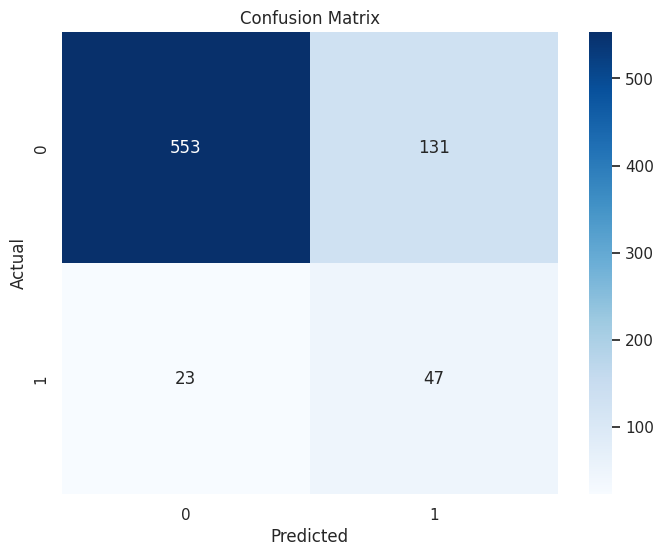

In [28]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model correctly identified 553 normal transactions (True Negatives) but had 131 false alarms (False Positives).

It detected 47 fraudulent transactions (True Positives) but missed 23 fraud cases (False Negatives).

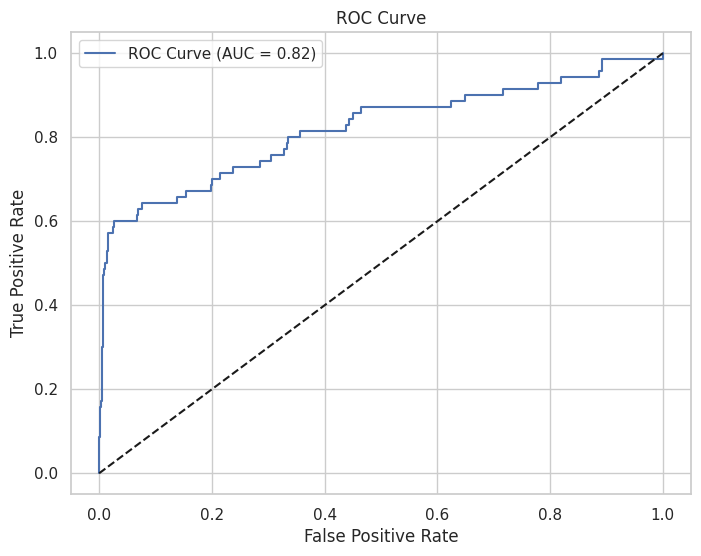

In [29]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_logreg):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The AUC of 0.82 confirms moderate classification power.

At a typical threshold, the model achieves ~60% true positive rate (TPR) while keeping false positive rate (FPR) near 20%.

Good overall discrimination but requires threshold tuning to balance TPR/FPR for business needs.

### 7. Presentation and formatting

This project developed a logistic regression model to detect fraudulent bank transactions, following a structured workflow from data exploration to model evaluation. The dataset revealed significant class imbalance, with fraudulent transactions comprising only a small minority. Key feature engineering steps included creating predictive ratios (e.g., transaction amount to account balance) and flags for unusual behavior (e.g., excessive login attempts).

Two models were compared: a baseline logistic regression and a feature-selected variant. Evaluation metrics showed the feature-selected model performed marginally better, achieving an ROC AUC of 0.824 (vs. 0.819) and improving fraud recall to 69% (vs. 67%). However, both models suffered from low precision (~26-29%), indicating frequent false positives. The confusion matrix highlighted this tradeoff: while capturing 47 true fraud cases, the model flagged 131 legitimate transactions as fraudulent. The ROC curve (AUC: 0.82) confirmed the model's ability to distinguish fraud but emphasized the need for threshold tuning to balance detection and false alarms.

Feature importance analysis identified login attempts, transaction amount, and account balance as top predictors, aligning with domain knowledge. Notably, higher account balances negatively correlated with fraud, suggesting targeting of low-balance accounts.